<a href="https://colab.research.google.com/github/Tolegithub7/ml_labs/blob/main/Detecting_and_preventing_overtif_and_underfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [7]:
X, y = make_classification(n_samples=9000, n_features=18, n_informative=4, n_redundant=12, random_state=4)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
train_scores, test_scores = list(), list()

In [19]:
values = [i for i in range(1, 21)]

In [20]:
for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.837, test: 0.834
>2, train: 0.853, test: 0.842
>3, train: 0.879, test: 0.867
>4, train: 0.906, test: 0.891
>5, train: 0.915, test: 0.901
>6, train: 0.933, test: 0.910
>7, train: 0.949, test: 0.923
>8, train: 0.965, test: 0.934
>9, train: 0.971, test: 0.934
>10, train: 0.978, test: 0.934
>11, train: 0.983, test: 0.934
>12, train: 0.990, test: 0.933
>13, train: 0.993, test: 0.933
>14, train: 0.995, test: 0.934
>15, train: 0.997, test: 0.933
>16, train: 0.998, test: 0.936
>17, train: 0.999, test: 0.929
>18, train: 0.999, test: 0.935
>19, train: 0.999, test: 0.934
>20, train: 0.999, test: 0.933


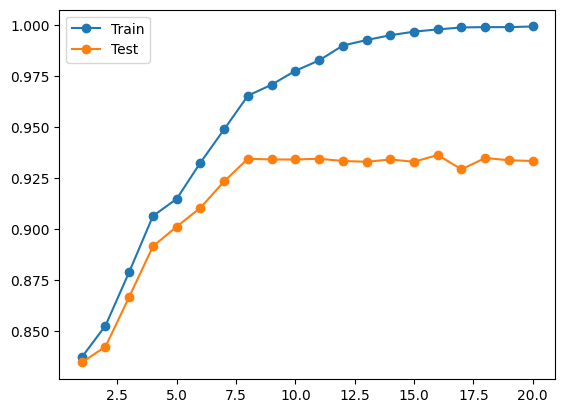

In [21]:
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [23]:
print(len(values))
print(len(train_scores))
print(len(test_scores))


20
20
20


In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 10, 20], 'min_samples_split': [5, 10, 20, 50, 100]}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, n_jobs=-1, scoring="accuracy")
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [30]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

In [31]:
print(accuracy_score(y_train, clf.best_estimator_.predict(X_train)))
print(accuracy_score(y_test, clf.best_estimator_.predict(X_test)))

0.9814285714285714
0.9503703703703704
